### IMPORTS

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### INPUT AND OUTPUT

In [3]:
# ----- #
# INPUT #
# ----- #
with open('../config/repository_path.txt', 'r') as reader:
    repository_path = reader.read().strip()

results_file = os.path.join(repository_path, 'results', 'ranking_function_simulations.csv')
assert os.path.isfile(results_file)

### Original Data

In [4]:
df = pd.read_csv(results_file)
df.shape

(2800, 39)

### Average Data

In [7]:
average_data= {'N': [],
               'n': [],
               'Ranking Function': [],
               'Effort': []
              }
metrics = ['Precision (training)',
           'Recall (training)',
           'F1-Score (training)',
           'Precision (test)',
           'Recall (test)',
           'F1-Score (test)',
           'Precision (held-out)',
           'Recall (held-out)',
           'F1-Score (held-out)',
          ]
for metric in metrics:
    average_data[metric]=[]
    
for (N,n,ranking_function),auxdf in list(df.groupby(['N', 'n', 'Ranking Function'])):
    average_data['Ranking Function'].append(ranking_function)
    average_data['N'].append(N)
    average_data['n'].append(n)
    
    total_effort=auxdf['Effort'].iloc[0]
    assert len(set(auxdf['Effort']))==1
    average_data['Effort'].append(total_effort)
    
    for metric in metrics:
        assert  len(auxdf[metric])==20
        average_data[metric].append(np.average(auxdf[metric]))
average_df = pd.DataFrame(average_data)
average_df

,N,n,Ranking Function,Effort,Precision (training),Recall (training),F1-Score (training),Precision (test),Recall (test),F1-Score (test),Precision (held-out),Recall (held-out),F1-Score (held-out)
0,291,1,half_and_half,21,0.727273,1.000000,0.839047,0.049009,1.000000,0.093398,0.050000,1.000000,0.095182
1,291,1,random,21,0.565909,1.000000,0.717432,0.049245,1.000000,0.093826,0.050000,1.000000,0.095182
2,291,1,relevance,21,0.722727,1.000000,0.837832,0.049016,1.000000,0.093409,0.050000,1.000000,0.095182
3,291,1,uncertainty,21,0.709091,1.000000,0.826411,0.049036,1.000000,0.093445,0.050000,1.000000,0.095182
4,291,3,half_and_half,60,0.693443,1.000000,0.818162,0.047387,1.000000,0.090443,0.050001,1.000000,0.095185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,5825,10,uncertainty,445,0.567776,0.998884,0.722321,0.131305,0.962569,0.227152,0.162561,0.972870,0.273204
136,5825,20,half_and_half,810,0.829670,0.977605,0.889222,0.430059,0.811682,0.503492,0.543633,0.887269,0.629182
137,5825,20,random,810,0.127390,1.000000,0.225690,0.045609,1.000000,0.087198,0.050023,1.000000,0.095224
138,5825,20,relevance,810,0.844096,0.973669,0.895534,0.465553,0.785930,0.529531,0.585924,0.877968,0.657677


### Plots

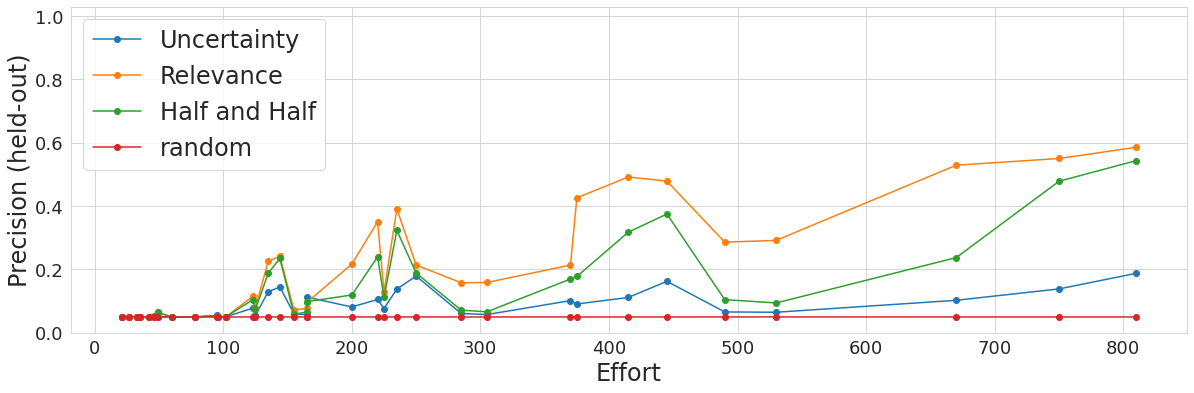

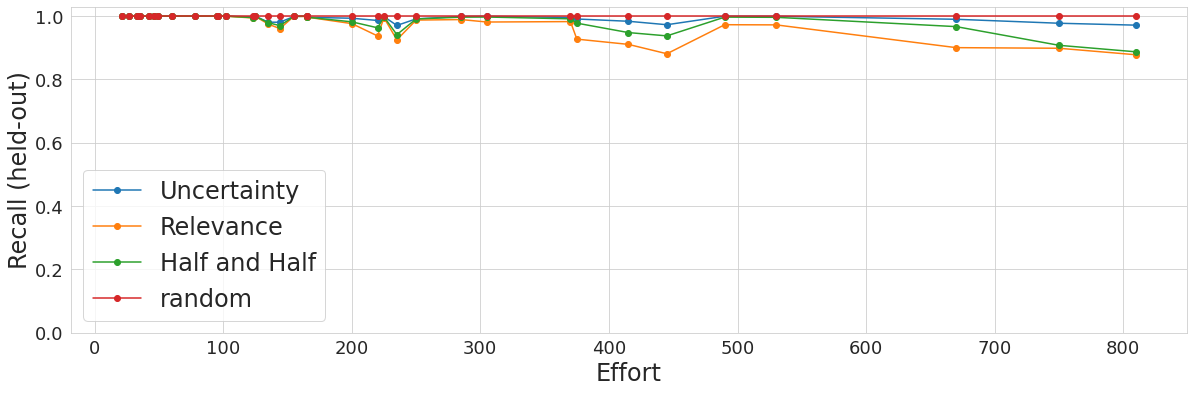

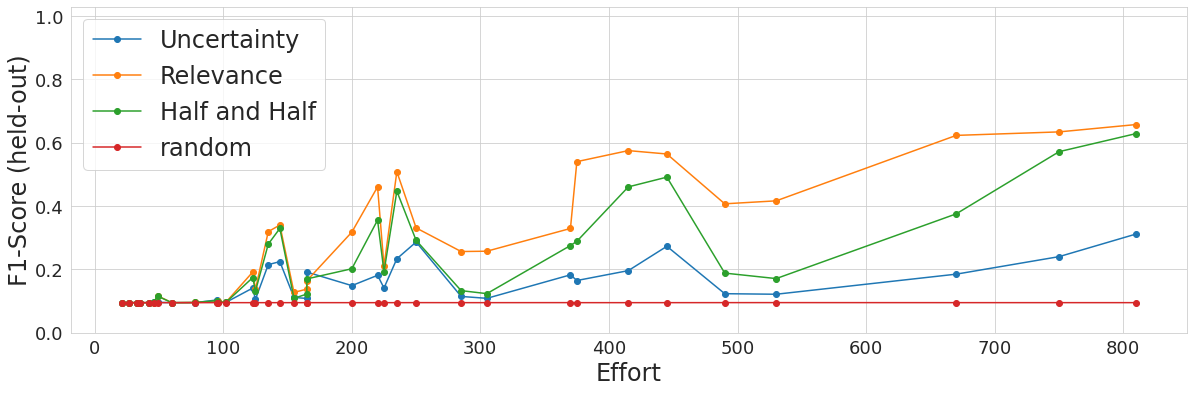

In [8]:
x_axis = 'Effort'
sns.set_style('whitegrid')

rf2label = {'relevance': 'Relevance', 'half_and_half': 'Half and Half', 'random': 'random', 'uncertainty': 'Uncertainty'}

for metric in ['Precision (held-out)', 'Recall (held-out)', 'F1-Score (held-out)']:
# for metric in ['Precision (test)', 'Recall (test)', 'F1-Score (test)']:
    fig, ax = plt.subplots(1, figsize=(20,6))
    for ranking_function in set(average_df['Ranking Function']):
        auxdf = average_df[average_df['Ranking Function']==ranking_function]
        auxdf=auxdf.sort_values(by='Effort')
        x = auxdf['Effort']
        y = auxdf[metric]
        ax.plot(x,y, label=rf2label[ranking_function], marker='o')
#         ax.plot(x,y, label=ranking_function, marker='o')

    ax.set_ylim(0,1.03)
    ax.set_xlabel(x_axis, fontsize=24)
    ax.set_ylabel(metric, fontsize=24)
    ax.legend(fontsize=24)

    ax.tick_params(axis='both', which='major', labelsize=18)
    fig.savefig(os.path.join(repository_path, 'results', 'figures', f'ng20_ranking_function_simulation_figures_{metric}.jpg'), bbox_inches='tight')
